In [2]:
import torch.utils
import torch.utils.data
import utils
from dataset import BuildingDataset
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from model import get_transform

In [3]:
# Load data for exploration.
dataset_test = BuildingDataset(
    "datasets/mlc_training_data/images/",
    "datasets/mlc_training_data/ground_truth_files/",
    "datasets/mlc_training_data/masks/SegmentationClass/",
)

dataset_test[0][1]

{'boxes': BoundingBoxes([[305, 464, 366, 504],
                [400, 401, 434, 436],
                [330, 362, 420, 482],
                [349, 276, 423, 337],
                [492, 350, 513, 372],
                [457, 283, 513, 339],
                [480, 387, 513, 411],
                [448, 368, 475, 401],
                [451, 332, 485, 358],
                [418, 293, 453, 389]], format=BoundingBoxFormat.XYXY, canvas_size=[512, 512]),
 'labels': tensor([2, 2, 1, 2, 1, 1, 1, 1, 1, 1]),
 'masks': Mask([[[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]],
 
       [[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 'building_heights': tensor([9, 9, 

In [4]:
# Load data for exploration.
dataset_expl = BuildingDataset(
    "datasets/mlc_training_data/images/",
    "datasets/mlc_training_data/ground_truth_files/",
    "datasets/mlc_training_data/masks/SegmentationClass/",
)

data = [d for d in dataset_expl]

In [6]:
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

img, masks = data[0][0], data[0][1]["masks"]

output_image = draw_segmentation_masks(
    img, masks.to(torch.bool), alpha=0.5, colors="blue"
)

plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

ValueError: The masks must be of dtype bool. Got torch.uint8

Quantile 0.25: 6.0
Quantile 0.5: 9.0
Quantile 0.75: 18.0
Quantile 0.95: 54.0
Quantile 0.99: 99.0


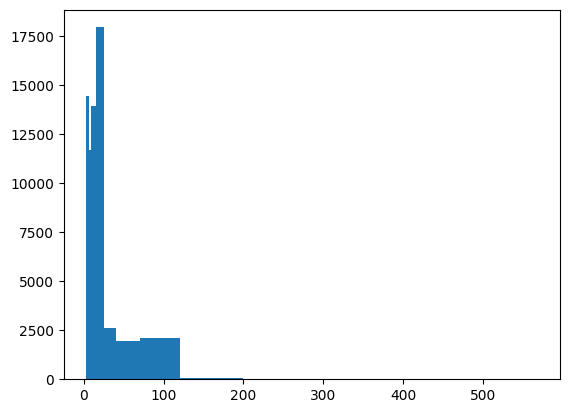

In [5]:
heights = [d[1]["building_heights"] for d in data]
heights = torch.cat(heights).numpy()

counts, bins = np.histogram(
    heights, bins=[3, 6, 9, 15, 25, 40, 70, 120, 200, heights.max()]
)
plt.stairs(counts, bins, fill=True)

for q in [0.25, 0.5, 0.75, 0.95, 0.99]:
    print(f"Quantile {q}: {np.quantile(heights, q)}")

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

dataset = BuildingDataset(
    "datasets/mlc_training_data/images/",
    "datasets/mlc_training_data/ground_truth_files/",
    "datasets/mlc_training_data/masks/SegmentationClass/",
    transforms=get_transform(train=True),
)

data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4,
    collate_fn=utils.collate_fn,
)

# For Training
images, targets = next(iter(data_loader))

images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)
print(predictions[0])